# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
import requests
from datetime import datetime
from scipy.stats import linregress

# OpenWeather developer API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lats_lngs = []
cities_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_list:
        cities_list.append(city)

# Print the city count to confirm sufficient count
print(len(cities_list))

592


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
Cities = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

# Loop through the list of cities and perform a request for data on each
print(f"Beginning Data Retrieval")
print(f"-----------------------------")
i = 1
for city in cities_list:
    response = requests.get(query_url + city).json()
    
    #Extracting data. Missing data is handled by try and except  
    try:
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Cities.append(city)
        print(f"Processing Record {i} | {city}")
        i += 1

    except:
        print("City not found. Skipping...")
    
print(f"-----------------------------")
print(f"Data Retrieval Complete")      
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | mar del plata
City not found. Skipping...
Processing Record 2 | nome
City not found. Skipping...
Processing Record 3 | bredasdorp
Processing Record 4 | seoul
Processing Record 5 | cayenne
Processing Record 6 | castro
Processing Record 7 | busselton
Processing Record 8 | kandi
Processing Record 9 | mataura
Processing Record 10 | corowa
Processing Record 11 | dzhebariki-khaya
City not found. Skipping...
Processing Record 12 | kargasok
Processing Record 13 | tuktoyaktuk
Processing Record 14 | arvika
Processing Record 15 | cape town
City not found. Skipping...
Processing Record 16 | byron bay
Processing Record 17 | sorland
Processing Record 18 | maltahohe
Processing Record 19 | hermanus
Processing Record 20 | tura
Processing Record 21 | victoria
Processing Record 22 | samandag
Processing Record 23 | kapaa
Processing Record 24 | tasiilaq
Processing Record 25 | nouakchott
Processing Record 26 | devils lake
Processin

City not found. Skipping...
Processing Record 228 | umm kaddadah
Processing Record 229 | santa cruz do capibaribe
Processing Record 230 | luderitz
Processing Record 231 | pisco
Processing Record 232 | richards bay
Processing Record 233 | srednekolymsk
City not found. Skipping...
Processing Record 234 | port macquarie
City not found. Skipping...
Processing Record 235 | alofi
Processing Record 236 | miraflores
Processing Record 237 | aykhal
Processing Record 238 | norman wells
City not found. Skipping...
Processing Record 239 | te anau
Processing Record 240 | san ramon
Processing Record 241 | broome
Processing Record 242 | umka
Processing Record 243 | komsomolskiy
Processing Record 244 | karratha
City not found. Skipping...
Processing Record 245 | padang
Processing Record 246 | sur
Processing Record 247 | bonavista
Processing Record 248 | marystown
City not found. Skipping...
Processing Record 249 | darhan
City not found. Skipping...
Processing Record 250 | olivenza
Processing Record 251

Processing Record 457 | paola
Processing Record 458 | velka bites
City not found. Skipping...
City not found. Skipping...
Processing Record 459 | sabalgarh
Processing Record 460 | kapit
Processing Record 461 | santa cruz
Processing Record 462 | esil
Processing Record 463 | sukhovolya
Processing Record 464 | nauta
Processing Record 465 | kaoma
Processing Record 466 | bambous virieux
Processing Record 467 | galdar
Processing Record 468 | mweka
Processing Record 469 | taiping
Processing Record 470 | urucara
Processing Record 471 | mayskiy
Processing Record 472 | bogense
Processing Record 473 | opuwo
Processing Record 474 | harrisonville
City not found. Skipping...
Processing Record 475 | verkhnevilyuysk
Processing Record 476 | camapua
Processing Record 477 | shar
Processing Record 478 | dingle
Processing Record 479 | avera
Processing Record 480 | hammerfest
Processing Record 481 | sioux lookout
Processing Record 482 | constitucion
Processing Record 483 | sosua
Processing Record 484 | vost

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Verifying that each list holds the same number of values and is >500
print (len(Cities))
print (len(Lat))
print (len(Lng))
print (len(Max_Temp))
print (len(Humidity))
print (len(Cloudiness))
print (len(Wind_Speed))
print (len(Country))
print (len(Date))

541
541
541
541
541
541
541
541
541


In [5]:
#Creating a dataframe with the responses
city_data = pd.DataFrame({"City":Cities,
                        "Lat":Lat,
                        "Lng":Lng,
                        "Max Temp":Max_Temp,
                        "Humidity":Humidity,
                        "Cloudiness":Cloudiness,
                        "Wind Speed":Wind_Speed,
                        "Country":Country, 
                        "Date":Date})
#Exporting data to csv
city_data.to_csv("output_files/city_data.csv", encoding="utf-8", index=True)

#Displaying dataframe
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.0023,-57.5575,59.00,71,90,4.61,AR,1616052184
1,nome,64.5011,-165.4064,3.20,72,1,6.91,US,1616052185
2,bredasdorp,-34.5322,20.0403,69.80,68,6,6.91,ZA,1616052186
3,seoul,37.5683,126.9778,66.20,39,75,11.50,KR,1616052187
4,cayenne,4.9333,-52.3333,78.01,94,100,9.15,GF,1616052188


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#Checking whether the dataframe has humidity max values over 100%
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,20.761916,16.626939,55.181257,72.907579,52.687616,7.904196,1.616052e+09
std,33.080327,90.343796,27.677730,20.897872,40.244857,5.017585,1.341259e+02
min,-54.800000,-175.200000,-26.270000,9.000000,0.000000,0.400000,1.616052e+09
25%,-5.250000,-60.438800,36.000000,65.000000,3.000000,4.470000,1.616052e+09
50%,24.800000,21.933300,62.600000,78.000000,62.000000,6.910000,1.616052e+09
75%,48.681400,90.220100,76.620000,89.000000,91.000000,10.360000,1.616052e+09
max,78.218600,179.316700,100.990000,100.000000,100.000000,29.930000,1.616053e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
#Converting Date for title of plot
timestamp = city_data["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

#Creating a function to generate scatter plots
def scatter(column_name, ylabel, namefile):
    city_data.plot.scatter('Lat',column_name, marker = "o", edgecolor = "black")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f"City Latitude vs. {column_name} ({shortened_timestamp})")
    plt.grid()
    plt.savefig(f"output_files/{namefile}")

## Latitude vs. Temperature Plot

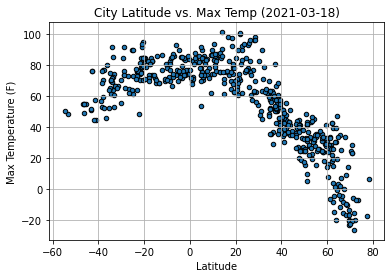

In [8]:
#Calling the scatter function to generate scatter plot of Lat vs Temp
scatter('Max Temp', "Max Temperature (F)", "Lat_vs_temp_plot")

## Latitude vs. Humidity Plot

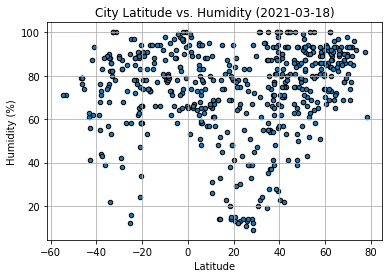

In [9]:
#Calling the scatter function to generate scatter plot of Lat vs Humidity
scatter('Humidity', "Humidity (%)", "Lat_vs_hum_plot")

## Latitude vs. Cloudiness Plot

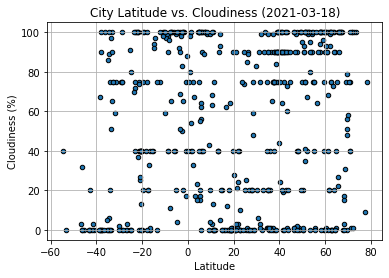

In [10]:
#Calling the scatter function to generate scatter plot of Lat vs Cloudiness
scatter('Cloudiness', "Cloudiness (%)", "Lat_vs_cloud_plot")

## Latitude vs. Wind Speed Plot

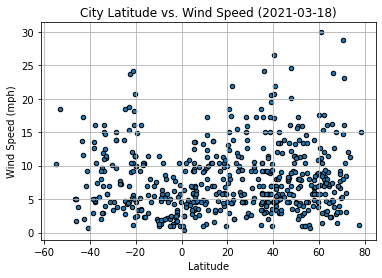

In [11]:
#Calling the scatter function to generate scatter plot of Lat vs Wind Speed
scatter('Wind Speed', "Wind Speed (mph)", "Lat_vs_wind_plot")

## Linear Regression

In [12]:
#Filtering the city_data into northern and southern hemisphere
northern_cities = city_data[city_data['Lat']>= 0]
southern_cities = city_data[city_data['Lat']< 0]

print(len(northern_cities))
print(len(southern_cities))

# Defining a function to create linear regression plots and add equation and line to plot
def linear_reg_plot(x_values,y_values, ylabel, hemisphere, namefile):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()), fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f"{hemisphere} Hemisphere Latitude vs. {ylabel}")
    print(f"The r-value is: {rvalue}")
    plt.savefig(f"output_files/{namefile}")

382
159


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8862107492994512


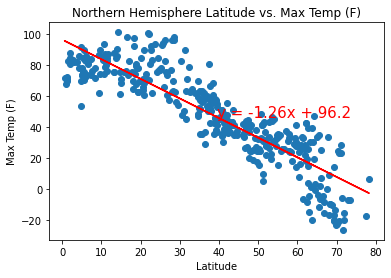

In [13]:
linear_reg_plot(northern_cities["Lat"], northern_cities["Max Temp"], "Max Temp (F)", "Northern", "nort_Lat_vs_temp_linplot")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5730244993525098


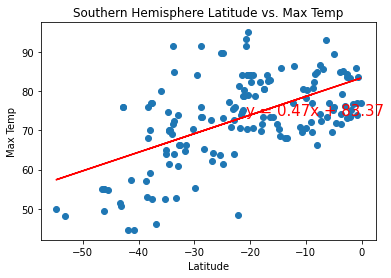

In [14]:
linear_reg_plot(southern_cities["Lat"], southern_cities["Max Temp"], "Max Temp", "Southern", "sout_Lat_vs_temp_linplot")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.34037244997787863


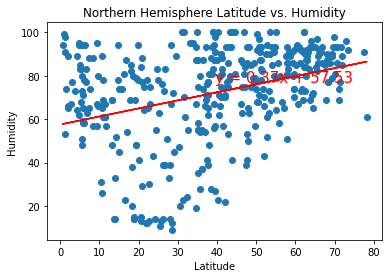

In [15]:
linear_reg_plot(northern_cities["Lat"], northern_cities["Humidity"], "Humidity", "Northern", "nort_Lat_vs_hum_linplot")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24079222892889088


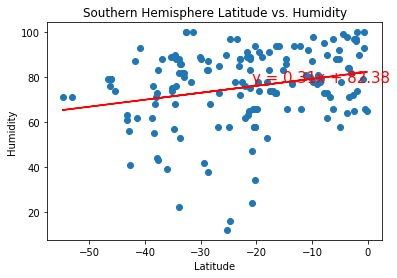

In [16]:
linear_reg_plot(southern_cities["Lat"], southern_cities["Humidity"], "Humidity", "Southern", "sout_Lat_vs_hum_linplot")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1706776497935001


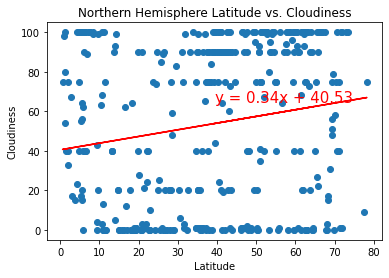

In [17]:
linear_reg_plot(northern_cities["Lat"], northern_cities["Cloudiness"], "Cloudiness", "Northern", "nort_Lat_vs_cloud_linplot")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.429867760370666


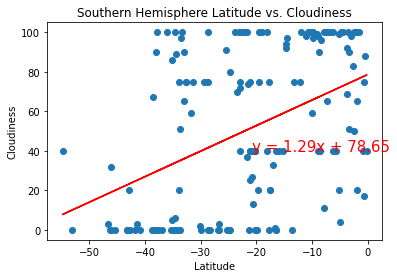

In [18]:
linear_reg_plot(southern_cities["Lat"], southern_cities["Cloudiness"], "Cloudiness", "Southern", "sout_Lat_vs_hum_linplot")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09465902210617301


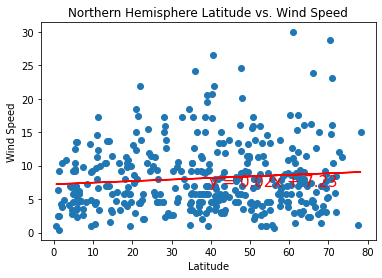

In [19]:
linear_reg_plot(northern_cities["Lat"], northern_cities["Wind Speed"], "Wind Speed", "Northern", "nort_Lat_vs_wind_linplot")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3026293677769684


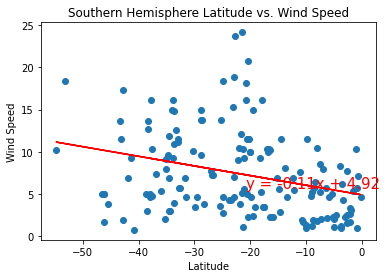

In [20]:
linear_reg_plot(southern_cities["Lat"], southern_cities["Wind Speed"], "Wind Speed", "Southern", "sout_Lat_vs_wind_linplot")

# Observable Trends:

- From all the scatter plots, it can be observed that the random selection of the 541 cities analysed are evenly distributed througout a latitute range (-60, 80), composed of 382 cities in the northern hemisphere and 159 cities in the southern hemisphere. These numbers indicate that our sample could be slightly skewed, oversampling the northern hemisphere, while not providing sufficient data on the southern hemisphere, specially cities concerning latitutes in the range (-90, -60).

- Regardless of issues with the data sampling, in the Lat vs Max Temp plots, it can be observed that the cities closest to the equator (closer to latitude = 0), present the highest maximum temperatures. This is further supported with the linear regression of lat vs temp when dividing the data in northern and southern hemispheres. The latitude and temperature of cities in the northern hemisphere present a negative correlation (r-square = -0.89), in which the maximum temperature drops as we move away from the equator into higher latitudes. Complementary, the latitude and temperature of cities in the southern hemisphere present a positive correlation (r-square = 0.57), in which the maximum temperature increases as we move away from more negative latitudes towards latitude 0 in the equator. The r-square value in the southern hemisphere is lower than expected, however this could be due to the lack of data sampling mentioned before and could be improved if more cities between latitude (-90, -60) are included.

- The rest of parameters analysed (humidity, cloudiness and wind speed) did not present a clear relationship with latitude. Overall it could be observed that the points where spread inconsistently throughout the latitude range examined. Moreover, all r-square parameters when calculating correlations in the northern and southern cities were closer to 0 (from -0.30 to 0.34), indicating that despite of some trends (increased humidity and decreased wind speed towards the equator in cities of the southern hemisphere), there is no strong relationship between the variables.